In [310]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle

In [289]:
legit=pd.read_csv("legit_final.csv")
phishing=pd.read_csv("phish_final.csv")
final_data=pd.concat([legit,phishing]).reset_index(drop=True)

#model_res=[[model_name],[test_res],[train_res]]
model_res=[[],[],[]]

In [290]:
#Donot drop if better dataset if found
# final_data.hist(bins=50,figsize=[20,20])
# plt.show()
# check if ifram and mouseover is not empty
# if empty drop
# final_data=final_data.drop(columns=['iframe','mouseover'])

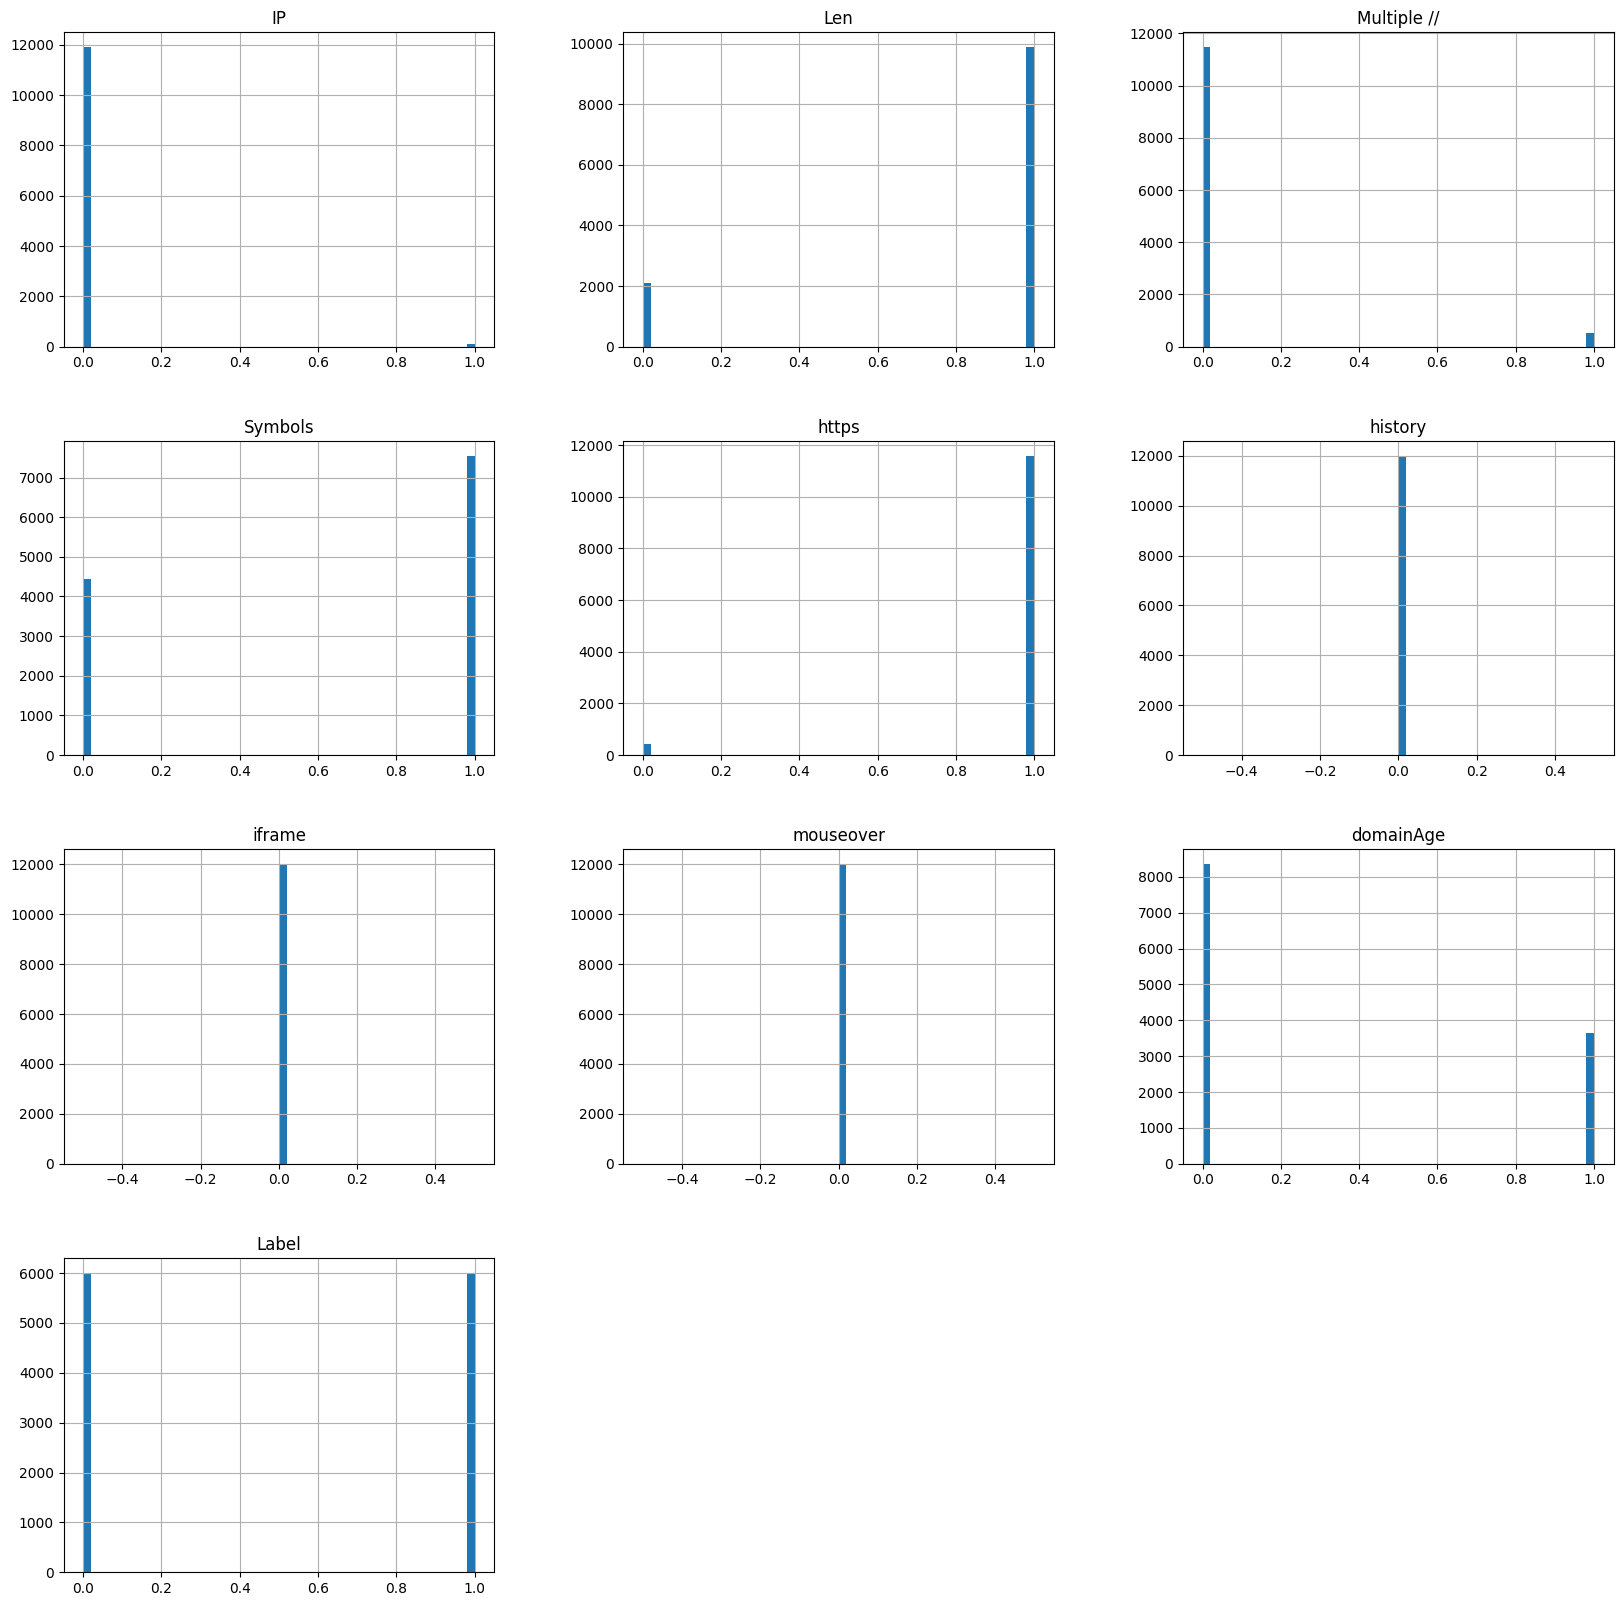

In [291]:
final_data.hist(bins=50,figsize=[20,20])
plt.show()

In [292]:
seed = 12
final_data = final_data.sample(random_state=seed,frac=1).reset_index(drop=True)
final_data


,IP,Len,Multiple //,Symbols,https,history,iframe,mouseover,domainAge,Label
0,0,1,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,1
2,0,1,0,0,1,0,0,0,1,0
3,0,1,0,1,1,0,0,0,1,0
4,0,1,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
11995,0,1,0,0,1,0,0,0,0,0
11996,0,1,0,1,1,0,0,0,0,1
11997,0,1,0,1,1,0,0,0,1,0
11998,0,1,0,1,1,0,0,0,1,1


In [293]:
y = final_data["Label"]
x = final_data.drop(columns=["Label"])

In [318]:
seed=10
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=seed)

train_x.shape,test_x.shape

,IP,Len,Multiple //,Symbols,https,history,iframe,mouseover,domainAge
1175,0,0,0,0,1,0,0,0,0
2715,0,0,0,0,1,0,0,0,0
8049,0,0,0,0,1,0,0,0,0
5145,0,1,0,1,1,0,0,0,1
4742,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7291,0,1,0,1,1,0,0,0,1
11633,0,0,0,0,1,0,0,0,0
1344,0,1,0,0,1,0,0,0,0
7293,0,1,0,0,0,0,0,0,0


Using SVM with linear kernel

In [295]:
svm=LinearSVC()

In [296]:
svm.fit(train_x,train_y)

LinearSVC()

In [297]:
test_y_svm=svm.predict(test_x)
train_y_svm=svm.predict(train_x)

In [298]:
acc_test_svm=accuracy_score(test_y,test_y_svm)
acc_train_svm=accuracy_score(train_y,train_y_svm)

model_res[0].append("SVM")
model_res[1].append(acc_test_svm)
model_res[2].append(acc_train_svm)

acc_test_svm,acc_train_svm

(0.7941666666666667, 0.809047619047619)

Using Xgboost

In [299]:
xgb=XGBClassifier()
xgb.fit(train_x,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [300]:
test_y_xgb=xgb.predict(test_x)
train_y_xgb=xgb.predict(train_x)

In [301]:
acc_test_xgb = accuracy_score(test_y, test_y_xgb)
acc_train_xgb = accuracy_score(train_y, train_y_xgb)

model_res[0].append("XGB")
model_res[1].append(acc_test_xgb)
model_res[2].append(acc_train_xgb)

acc_test_xgb, acc_train_xgb


(0.7961111111111111, 0.8122619047619047)

Using Neural Network

In [302]:
mlp=MLPClassifier()
mlp.fit(train_x,train_y)

MLPClassifier()

In [303]:
test_y_mlp=mlp.predict(test_x)
train_y_mlp=mlp.predict(train_x)

In [304]:
acc_test_mlp = accuracy_score(test_y, test_y_mlp)
acc_train_mlp = accuracy_score(train_y, train_y_mlp)

model_res[0].append("MLP")
model_res[1].append(acc_test_mlp)
model_res[2].append(acc_train_mlp)

acc_test_mlp, acc_train_mlp


(0.7966666666666666, 0.8125)

KNeighbours Classifier

In [305]:
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)

KNeighborsClassifier()

In [306]:
test_y_knc=knc.predict(test_x)
train_y_knc=knc.predict(train_x)

In [307]:
acc_test_knc = accuracy_score(test_y, test_y_knc)
acc_train_knc = accuracy_score(train_y, train_y_knc)

model_res[0].append("KNC")
model_res[1].append(acc_test_knc)
model_res[2].append(acc_train_knc)

acc_test_knc, acc_train_knc

(0.7963888888888889, 0.8123809523809524)

In [308]:
res=pd.DataFrame(data=np.transpose(model_res),columns=["Model","test accuracy","train accuracy"])

res.sort_values(by=["test accuracy","train accuracy"],ascending=False)

,Model,test accuracy,train accuracy
2,MLP,0.7966666666666666,0.8125
3,KNC,0.7963888888888889,0.8123809523809524
1,XGB,0.7961111111111111,0.8122619047619047
0,SVM,0.7941666666666667,0.809047619047619


In [317]:
with open('mlp_model.pkl',"wb") as mod_file:
    pickle.dump(mlp,mod_file)